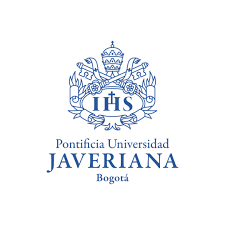
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **SQL con PySpark**

Autor: Ricardo Hurtado

Fecha: 5/05/25

**Objetivo**: Uso de SQL como motor de Consultas sobre DataFrame Spark.

Proporciona una abstracción de programación denominada DataFrames y también puede actuar como motor de consulta SQL distribuido. Permite ejecutar consultas Hadoop Hive no modificadas hasta 100 veces más rápido en implementaciones y datos existentes. También proporciona una potente integración con el resto del ecosistema Spark (por ejemplo, integrando el procesamiento de consultas SQL con MLib).

Spark SQL aporta soporte nativo para SQL a Spark y agiliza el proceso de consulta de datos almacenados tanto en RDD como en fuentes externas. Spark SQL difumina convenientemente las líneas entre RDDs y tablas relacionales. Spark SQL permite:

- Importar datos relacionales de archivos Parquet y tablas Hive
- Ejecutar consultas SQL sobre datos importados y RDDs existentes
- Escribir fácilmente RDDs en tablas Hive o archivos Parquet.

Spark SQL también incluye un optimizador basado en costes, almacenamiento en columnas y generación de código para agilizar las consultas. Al mismo tiempo, escala a miles de nodos y consultas de varias horas utilizando el motor Spark, que proporciona una tolerancia total a fallos a mitad de consulta, sin tener que preocuparse de utilizar un motor diferente para los datos históricos.

____________________________________________________

**1.- Crear sessión PySpark SQL**



In [1]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()

**2.-Crear DataFrame Spark:**
- Al menos 15 registros: nombres y edades entre (10 y 70 años)**
- Mostrar dataframe

```
df00 = spark.createDataFrame(
        [
            ("nombre1", 22),
            ("nombre2", 31),
        ],
        ["Nombre", "Edad"],
)
```

In [2]:
df00 = spark.createDataFrame(
        [
            ("Ricardo",20),
            ("Juan",21),
            ("Andres",10),
            ("Maria",15),
            ("Teresa",25),
            ("Carlos",30),
            ("Danilo",35),
            ("Camilo",40),
            ("Sofia",15),
            ("Helena", 16),
            ("Pedro",54),
            ("Julian", 17),
            ("Felipe", 20),
            ("Luis",19),
            ("Dayan", 22),
        ],
        ["Nombre", "Edad"],
)
df00.show()


+-------+----+
| Nombre|Edad|
+-------+----+
|Ricardo|  20|
|   Juan|  21|
| Andres|  10|
|  Maria|  15|
| Teresa|  25|
| Carlos|  30|
| Danilo|  35|
| Camilo|  40|
|  Sofia|  15|
| Helena|  16|
|  Pedro|  54|
| Julian|  17|
| Felipe|  20|
|   Luis|  19|
|  Dayan|  22|
+-------+----+



**3.- Agregue una nueva columna "Etapa":**
- Niño: menores de 12 años
- Adolescente: menores de 19 años
- Adulto: mayor que 19 años
- Mostrar dataframe



```
df1 = df.withColumn(
    "nombreColumna",
    when(col("nom") < 100, "vivo")
    .when(col("nom").between(100, 180), "novivo")
    .otherwise("nacer"),
)
```

In [11]:
df01 = df00.withColumn(
    "Etapa",
    when(col("Edad") < 12, "Niño")
    .when(col("Edad") < 19, "Adolescente")
    .otherwise("Adulto"),

)
df01.show()


+-------+----+-----------+
| Nombre|Edad|      Etapa|
+-------+----+-----------+
|Ricardo|  20|     Adulto|
|   Juan|  21|     Adulto|
| Andres|  10|       Niño|
|  Maria|  15|Adolescente|
| Teresa|  25|     Adulto|
| Carlos|  30|     Adulto|
| Danilo|  35|     Adulto|
| Camilo|  40|     Adulto|
|  Sofia|  15|Adolescente|
| Helena|  16|Adolescente|
|  Pedro|  54|     Adulto|
| Julian|  17|Adolescente|
| Felipe|  20|     Adulto|
|   Luis|  19|     Adulto|
|  Dayan|  22|     Adulto|
+-------+----+-----------+



**4.- Filtre los datos que son solo 'Adolescentes y Adultos'**


```
dfA.where(col("columna").isin(["vivo", "novivo"])).show()
```

In [15]:
df02 = df01.where(col("Etapa").isin(["Adolescente", "Adulto"]))
df02.show()

+-------+----+-----------+
| Nombre|Edad|      Etapa|
+-------+----+-----------+
|Ricardo|  20|     Adulto|
|   Juan|  21|     Adulto|
|  Maria|  15|Adolescente|
| Teresa|  25|     Adulto|
| Carlos|  30|     Adulto|
| Danilo|  35|     Adulto|
| Camilo|  40|     Adulto|
|  Sofia|  15|Adolescente|
| Helena|  16|Adolescente|
|  Pedro|  54|     Adulto|
| Julian|  17|Adolescente|
| Felipe|  20|     Adulto|
|   Luis|  19|     Adulto|
|  Dayan|  22|     Adulto|
+-------+----+-----------+



### Consultas al Dataframe por SQL

**5.- Consulte el promedio de la columna Edad**



```
spark.sql("select avg(Edad) from {dfB}", dfB=dfB).show()
```

In [16]:
df00.select(avg("Edad")).show()

+------------------+
|         avg(Edad)|
+------------------+
|23.933333333333334|
+------------------+



**6.- Consulte el promedio de la columna Edad por Etapa**



```
spark.sql("select colStage, avg(edad) from {dfH} group by colStage", dfH=dfH).show()
```



In [17]:
df01.createOrReplaceTempView("temp_table")
spark.sql("select Etapa, avg(Edad) from temp_table group by Etapa").show()

+-----------+---------+
|      Etapa|avg(Edad)|
+-----------+---------+
|Adolescente|    15.75|
|       Niño|     10.0|
|     Adulto|     28.6|
+-----------+---------+



**7.- Persistencia: crear un tabla para ser facilmente accesible por el API SQL**

- Crear la tabla
- Mostrar la tabla creada
- Insertar al menos 4 nuevos registros
- Mostrar nueva tabla

```
dfG.write.saveAsTable("nombreTabla")

spark.sql("select * from nombreTabla").show()

spark.sql("INSERT INTO nombreTabla VALUES ('nNombre', 14, 'vivo')")
```

In [19]:
df01.write.saveAsTable("TablaSQL")
spark.sql("select * from TablaSQL").show()
spark.sql("INSERT INTO TablaSQL VALUES ('Diana', 13, 'Niño')")

+-------+----+-----------+
| Nombre|Edad|      Etapa|
+-------+----+-----------+
|Ricardo|  20|     Adulto|
|   Juan|  21|     Adulto|
| Andres|  10|       Niño|
|  Maria|  15|Adolescente|
| Teresa|  25|     Adulto|
| Carlos|  30|     Adulto|
| Danilo|  35|     Adulto|
| Camilo|  40|     Adulto|
|  Sofia|  15|Adolescente|
| Helena|  16|Adolescente|
|  Pedro|  54|     Adulto|
| Julian|  17|Adolescente|
| Felipe|  20|     Adulto|
|   Luis|  19|     Adulto|
|  Dayan|  22|     Adulto|
+-------+----+-----------+



DataFrame[]

**8.- Consulte en la tabla los adolescentes:**



```
spark.sql("select * from TablaNombre where NTapaS='vivos'").show()
```

In [20]:
spark.sql("select * from TablaSQL where Etapa='Adolescente'").show()

+------+----+-----------+
|Nombre|Edad|      Etapa|
+------+----+-----------+
| Maria|  15|Adolescente|
| Sofia|  15|Adolescente|
|Helena|  16|Adolescente|
|Julian|  17|Adolescente|
+------+----+-----------+



## RDD Spark

**9.- Carge el Fichero [texto.txt](https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt) para ser leido por el contexto SPARK**

- Descargue el fichero
- Crear el contexto y cargue el fichero



```
fichero = spark.sparkContext.textFile("texto.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)
```



In [26]:
file_path = "/content/SMSSpamCollection.txt"

fichero = spark.sparkContext.textFile(file_path)

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)

## **10.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

Este es un ejercicio Util para poner a prueba las bases de como utilizar Spark SQL en un Notebook de jupyter, es un ejercicio util pq se ponen a prueba las habilidades nesesarias para las consultas basicas de sql en spark como por ej:Crear un dataframe, crear un contexto spark, Crear una tabla SQL, Introducir datos nuevos, Visualizar datos especificos de la tabla.